In [100]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [130]:
"""
load data
data source "http://www.nj.gov/education/finance/fp/ufb/2015/download/employees15.csv"
"""

data = pd.read_csv('/Users/prashant/Downloads/salaries.csv')

In [124]:
#Firstly, look at the structure of our data
data.head(5)

,COUNTY_ID,CONAME,EMP_DISTRICT_ID,DISTNAME,EMP_NAME,EMP_JOB_TITLE,EMP_JOB_TITLE_2,EMP_BASE_SALARY,EMP_FTE,EMP_SHARED,...,TOTAL_REMUNERATION,BUYBACK_SICK_TIME_IN_CASH,BUYBACK_VACATION_TIME_IN_CASH,BUYBACK_PERSONAL_TIME_IN_CASH,OTHER_REMUNERATION_1,OTHER_REMUNERATION_2,OTHER_REMUNERATION_3,ADDITIONAL_COMMENT_1,ADDITIONAL_COMMENT_2,ADDITIONAL_COMMENT_3
0,1,ATLANTIC,10,ABSECON CITY,Allen Suhr,Coordinator/Director/Manager/Supervisor,NaN,"$86,060",1.0,N,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,ATLANTIC,10,ABSECON CITY,Scott Sarraiocco,Coordinator/Director/Manager/Supervisor,Supervisor of Instruction,"$96,448",1.0,N,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,ATLANTIC,10,ABSECON CITY,Theresa DeFranco,Superintendent,NaN,"$142,000",1.0,N,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,ATLANTIC,10,ABSECON CITY,Tina Davisson,Business Administrator,Board Secretary,"$102,974",1.0,N,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,ATLANTIC,110,ATLANTIC CITY,Angela Brown,Administrative Assistant,NaN,"$90,410",1.0,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
"""
 Numerals:
    # COUNTY_ID
    # EMP_DISTRICT_ID
    # EMP_BASE_SALARY
    # EMP_FTE
    # EMP_COUNTY
    # EMP_DISTRICT
    # EMP_WORK_DAY
    # EMP_VACA_DAY
    # EMP_SICK_DAY
    # EMP_PERSN_DAY
    # EMP_CNSLT_DAY
    # EMP_NON_WORK_DAY
    # TOTAL_ALLOWANCES
    # TOTAL_BONUSES
    # TOTAL_STIPENDS
    # TOTAL_INSURANCE
    # TOTAL_RETIREMENT_PLAN
    # TOTAL_POST_EMPLOYMENT_BENEFITS
    # OTHER_POST_EMPLOYMENT_BENEFITS_1
    # OTHER_POST_EMPLOYMENT_BENEFITS_2
    # OTHER_POST_EMPLOYMENT_BENEFITS_3
    # TOTAL_REMUNERATION
    # BUYBACK_SICK_TIME_IN_CASH
    # BUYBACK_VACATION_TIME_IN_CASH
    # BUYBACK_PERSONAL_TIME_IN_CASH
    # OTHER_REMUNERATION_1
    # OTHER_REMUNERATION_2
    # OTHER_REMUNERATION_3
    
 Categorical:
    # CONAME
    # DISTNAME
    # EMP_NAME
    # EMP_JOB_TITLE
    # EMP_JOB_TITLE_2
    # EMP_FTE
    # EMP_JOB_DESC_OTHER
    # EMP_MEMBER_CBU
    # EMP_NON_WORK_DESC
    # PAYOUT_OF_SICK_DAYS
    # PAYOUT_OF_VACATION_DAYS
    # PAYOUT_OF_PERSONAL_DAYS
    # ADDITIONAL_COMMENT_1
    # ADDITIONAL_COMMENT_2
    # ADDITIONAL_COMMENT_3
    
  Date:
    # EMP_BEGIN_DATE
    # EMP_END_DATE
   
information about the real types and not null values
"""
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3736 entries, 0 to 3735
Data columns (total 45 columns):
COUNTY_ID                           3736 non-null int64
CONAME                              3736 non-null object
EMP_DISTRICT_ID                     3736 non-null int64
DISTNAME                            3736 non-null object
EMP_NAME                            3735 non-null object
EMP_JOB_TITLE                       3735 non-null object
EMP_JOB_TITLE_2                     2060 non-null object
EMP_BASE_SALARY                     3736 non-null object
EMP_FTE                             3736 non-null float64
EMP_SHARED                          3735 non-null object
EMP_COUNTY                          260 non-null float64
EMP_DISTRICT                        259 non-null float64
EMP_JOB_DESC_OTHER                  259 non-null object
EMP_MEMBER_CBU                      3735 non-null object
EMP_BEGIN_DATE                      3736 non-null object
EMP_END_DATE                        3736

In [131]:
"""
Since OTHER_POST_EMPLOYMENT_BENEFITS_1/2/3 contains no info as can be seen from data.info method, I will drop them.
"""
data.drop(['OTHER_POST_EMPLOYMENT_BENEFITS_1', 'OTHER_POST_EMPLOYMENT_BENEFITS_2', 'OTHER_POST_EMPLOYMENT_BENEFITS_3'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3736 entries, 0 to 3735
Data columns (total 42 columns):
COUNTY_ID                         3736 non-null int64
CONAME                            3736 non-null object
EMP_DISTRICT_ID                   3736 non-null int64
DISTNAME                          3736 non-null object
EMP_NAME                          3735 non-null object
EMP_JOB_TITLE                     3735 non-null object
EMP_JOB_TITLE_2                   2060 non-null object
EMP_BASE_SALARY                   3736 non-null object
EMP_FTE                           3736 non-null float64
EMP_SHARED                        3735 non-null object
EMP_COUNTY                        260 non-null float64
EMP_DISTRICT                      259 non-null float64
EMP_JOB_DESC_OTHER                259 non-null object
EMP_MEMBER_CBU                    3735 non-null object
EMP_BEGIN_DATE                    3736 non-null object
EMP_END_DATE                      3736 non-null object
EMP_WORK_DAY   

In [132]:
data['EMP_BASE_SALARY'] = data['EMP_BASE_SALARY'].str.replace('$', '')
data['EMP_BASE_SALARY'] = data['EMP_BASE_SALARY'].str.replace(',', '')

data['EMP_BASE_SALARY'] = pd.to_numeric(data['EMP_BASE_SALARY'])
#data[data['EMP_BASE_SALARY']==',']
#print data.loc[pd.to_numeric(data['EMP_BASE_SALARY'], errors='coerce').isnull()]

#print('EMP_FTE unique values:')
#data['EMP_FTE'].unique()   
data.head()
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3736 entries, 0 to 3735
Data columns (total 42 columns):
COUNTY_ID                         3736 non-null int64
CONAME                            3736 non-null object
EMP_DISTRICT_ID                   3736 non-null int64
DISTNAME                          3736 non-null object
EMP_NAME                          3735 non-null object
EMP_JOB_TITLE                     3735 non-null object
EMP_JOB_TITLE_2                   2060 non-null object
EMP_BASE_SALARY                   3736 non-null int64
EMP_FTE                           3736 non-null float64
EMP_SHARED                        3735 non-null object
EMP_COUNTY                        260 non-null float64
EMP_DISTRICT                      259 non-null float64
EMP_JOB_DESC_OTHER                259 non-null object
EMP_MEMBER_CBU                    3735 non-null object
EMP_BEGIN_DATE                    3736 non-null object
EMP_END_DATE                      3736 non-null object
EMP_WORK_DAY    

In [133]:
data['EMP_BASE_SALARY']=data['EMP_BASE_SALARY'].fillna(0)
data['TOTAL_ALLOWANCES']=data['TOTAL_ALLOWANCES'].fillna(0)
data['TOTAL_BONUSES']=data['TOTAL_BONUSES'].fillna(0)
data['TOTAL_STIPENDS']=data['TOTAL_STIPENDS'].fillna(0)
data['TOTAL_INSURANCE']=data['TOTAL_INSURANCE'].fillna(0)
data['TOTAL_RETIREMENT_PLAN']=data['TOTAL_RETIREMENT_PLAN'].fillna(0)
data['TOTAL_POST_EMPLOYMENT_BENEFITS']=data['TOTAL_POST_EMPLOYMENT_BENEFITS'].fillna(0)

data["TotalSalary"] = data["EMP_BASE_SALARY"] + data["TOTAL_ALLOWANCES"] + data["TOTAL_BONUSES"] + data["TOTAL_STIPENDS"] + data["TOTAL_INSURANCE"] + data["TOTAL_RETIREMENT_PLAN"] +  data["TOTAL_POST_EMPLOYMENT_BENEFITS"]
data.drop(['EMP_BASE_SALARY', 'TOTAL_ALLOWANCES', 'TOTAL_BONUSES', 'TOTAL_STIPENDS', 'TOTAL_INSURANCE', 'TOTAL_RETIREMENT_PLAN', 'TOTAL_POST_EMPLOYMENT_BENEFITS'], axis=1, inplace=True)
data.info
data.head()

,COUNTY_ID,CONAME,EMP_DISTRICT_ID,DISTNAME,EMP_NAME,EMP_JOB_TITLE,EMP_JOB_TITLE_2,EMP_FTE,EMP_SHARED,EMP_COUNTY,...,BUYBACK_SICK_TIME_IN_CASH,BUYBACK_VACATION_TIME_IN_CASH,BUYBACK_PERSONAL_TIME_IN_CASH,OTHER_REMUNERATION_1,OTHER_REMUNERATION_2,OTHER_REMUNERATION_3,ADDITIONAL_COMMENT_1,ADDITIONAL_COMMENT_2,ADDITIONAL_COMMENT_3,TotalSalary
0,1,ATLANTIC,10,ABSECON CITY,Allen Suhr,Coordinator/Director/Manager/Supervisor,NaN,1.0,N,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103060.0
1,1,ATLANTIC,10,ABSECON CITY,Scott Sarraiocco,Coordinator/Director/Manager/Supervisor,Supervisor of Instruction,1.0,N,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102398.0
2,1,ATLANTIC,10,ABSECON CITY,Theresa DeFranco,Superintendent,NaN,1.0,N,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162961.0
3,1,ATLANTIC,10,ABSECON CITY,Tina Davisson,Business Administrator,Board Secretary,1.0,N,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119974.0
4,1,ATLANTIC,110,ATLANTIC CITY,Angela Brown,Administrative Assistant,NaN,1.0,N,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90410.0


In [138]:
data['EMP_JOB_TITLE'].unique()  
data.describe()


,COUNTY_ID,EMP_DISTRICT_ID,EMP_FTE,EMP_COUNTY,EMP_DISTRICT,EMP_WORK_DAY,EMP_VACA_DAY,EMP_SICK_DAY,EMP_PERSN_DAY,EMP_CNSLT_DAY,EMP_NON_WORK_DAY,TOTAL_REMUNERATION,TotalSalary
count,3736.000000,3736.000000,3736.000000,260.000000,259.000000,3736.000000,3736.000000,3736.000000,3736.000000,3736.000000,3736.000000,3692.000000,3736.000000
mean,19.085653,2938.952623,0.970610,18.415385,2307.930502,248.191113,19.429604,11.983940,3.287206,0.004283,6.098501,374.169827,135974.785332
std,12.016818,1676.312015,0.150174,12.475635,1726.899948,36.424507,6.805099,3.360971,1.425605,0.179193,18.723234,2520.913287,52636.172898
min,1.000000,10.000000,0.000000,1.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,1450.000000,1.000000,NaN,NaN,247.000000,20.000000,12.000000,3.000000,0.000000,0.000000,NaN,101623.000000
50%,19.000000,3142.500000,1.000000,NaN,NaN,260.000000,20.000000,12.000000,3.000000,0.000000,0.000000,NaN,128356.000000
75%,29.000000,4240.000000,1.000000,NaN,NaN,260.000000,22.000000,13.000000,4.000000,0.000000,4.000000,NaN,166910.250000
max,41.000000,5920.000000,1.000000,41.000000,5870.000000,280.000000,50.000000,70.000000,28.000000,10.000000,329.000000,58362.000000,528495.000000


In [145]:
print('All unique job titles:', len(data['CONAME'].unique()) - 1)

('All unique job titles:', 20)


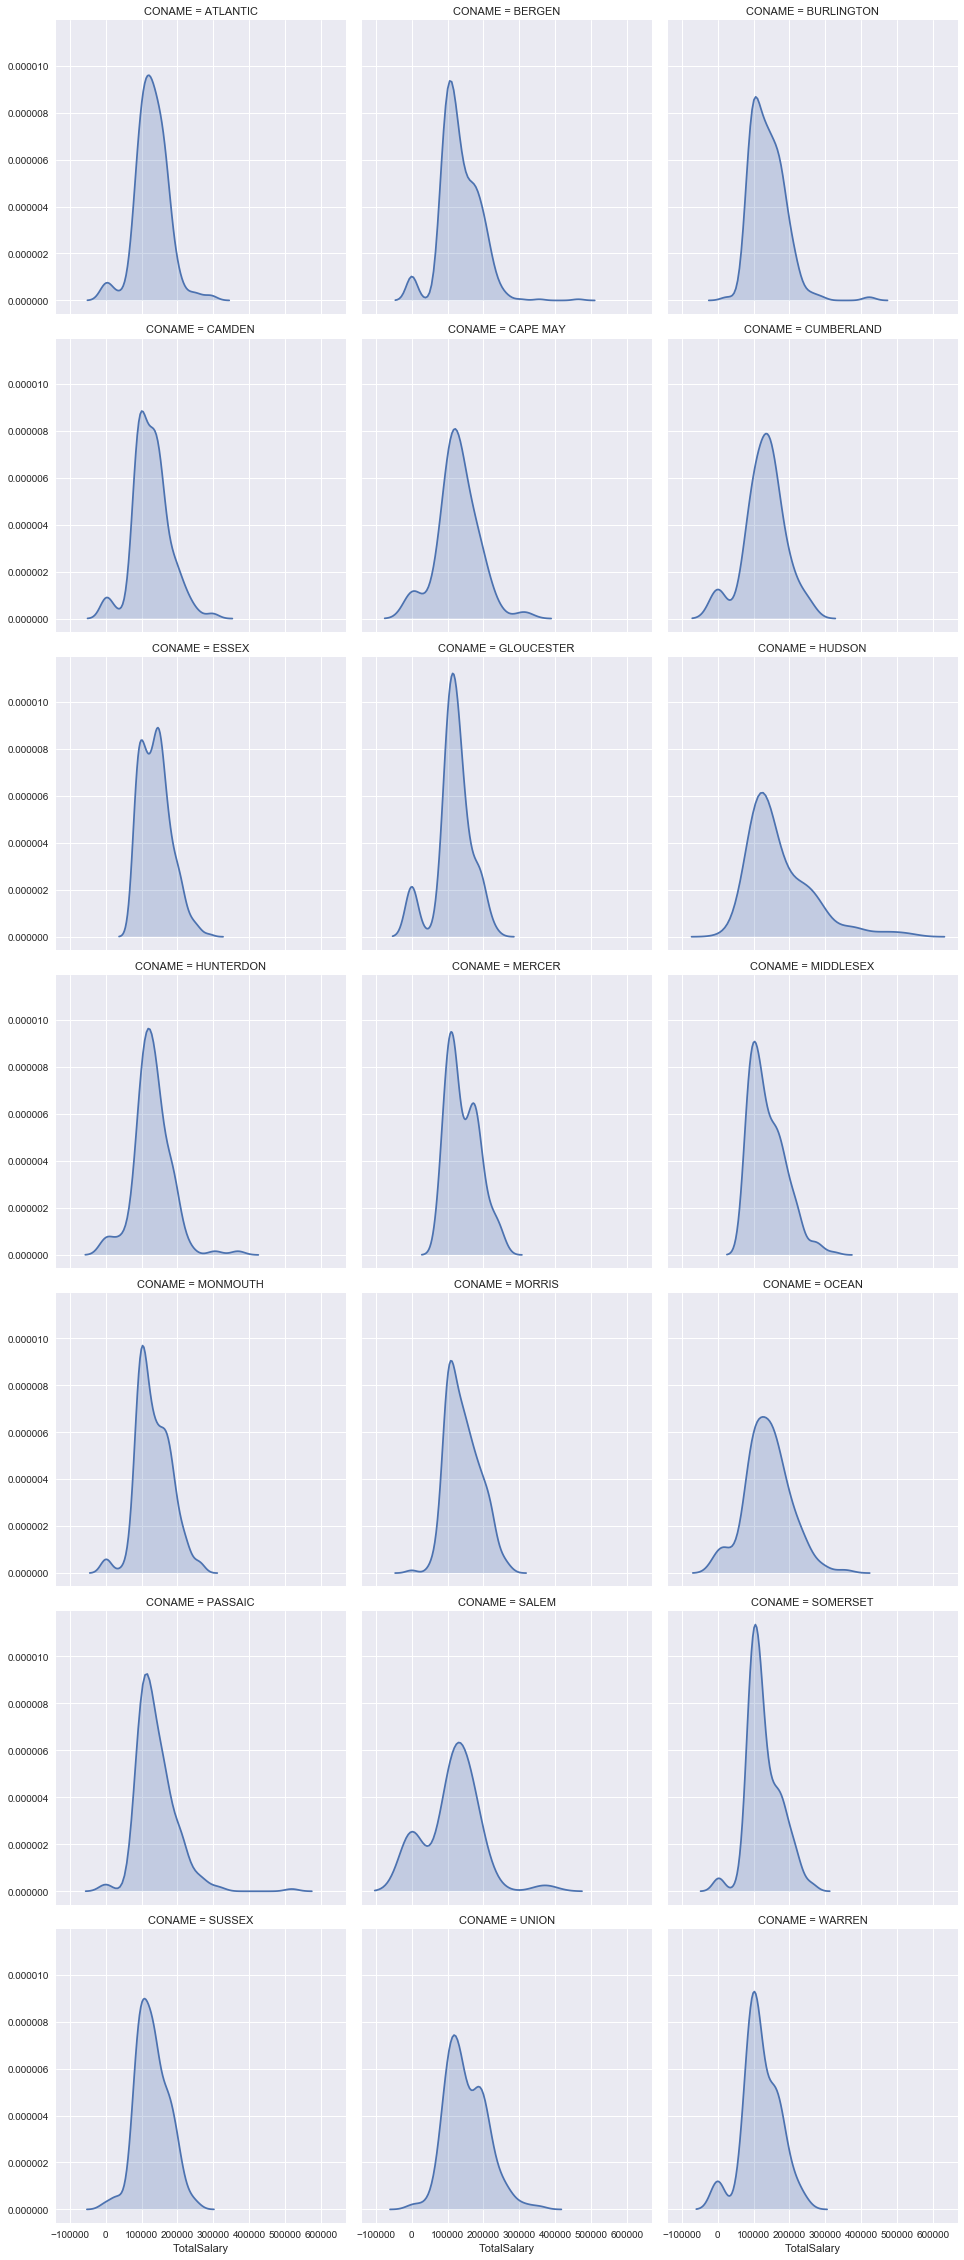

In [150]:
g = sns.FacetGrid(data, col="CONAME", col_wrap=3, size=4.5, dropna=True)
res = g.map(sns.kdeplot, 'TotalSalary', shade=True)

In [167]:
df_Job = data[["TotalSalary"] + ["EMP_JOB_TITLE"]].groupby(by = ["EMP_JOB_TITLE"], as_index = False)
df_Job_NumberOfPeople = df_Job.count()
df_Job_NumberOfPeople["Count"] = df_Job_NumberOfPeople["TotalSalary"]
df_Job_NumberOfPeople.drop(["TotalSalary"], axis = 1, inplace = True)
df_Job_NumberOfPeople.sort_values(by = "Count", inplace = True)
df_Job_NumberOfPeople.head()

,EMP_JOB_TITLE,Count
19,Speech Therapist,1
18,Social Worker,2
13,Nurse,3
11,Guidance Counselor,6
20,State Fiscal Monitor,7


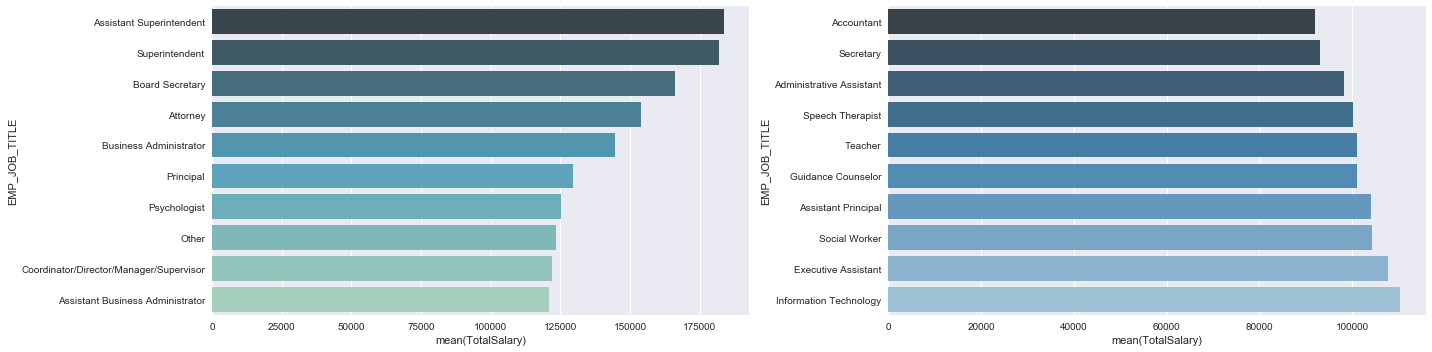

In [168]:

df_Job = df_Job.mean()

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(20,5))

# 1] 10 job profile with highest TotalSalary 
# 2] 10 job profile with lowest TotalSalary
sns.barplot(x = "TotalSalary", y = "EMP_JOB_TITLE", data = df_Job.sort_values(by = "TotalSalary", ascending = False).head(10), palette="GnBu_d", ax = axis1)
sns.barplot(x = "TotalSalary", y = "EMP_JOB_TITLE", data = df_Job.sort_values(by = "TotalSalary").head(10), palette="Blues_d", ax = axis2)

fig.tight_layout()